## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
from skimpy import clean_columns

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.simplefilter('ignore')

In [2]:
# Setting matplotlib parameters for plotting

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16
LARGE_SIZE = 20

params = {
    'figure.figsize': (16, 8),
    'font.size': SMALL_SIZE,
    'xtick.labelsize': MEDIUM_SIZE,
    'ytick.labelsize': MEDIUM_SIZE,
    'legend.fontsize': BIG_SIZE,
    'figure.titlesize': LARGE_SIZE,
    'axes.titlesize': MEDIUM_SIZE,
    'axes.labelsize': BIG_SIZE
}

plt.rcParams.update(params)

## Loading and Inspecting the data

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Dropping `RowNumber`, `CustomerId` and `Surname` columns as they are not useful in analysis and modeling

drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns = drop_cols, inplace = True)

In [5]:
# Cleaning the column names

df = clean_columns(df)

11 column names have been cleaned

In [6]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# No.of rows and columns in dataframe

df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.nunique()

credit_score         460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    9999
exited                 2
dtype: int64

In [10]:
# Changing data type of `num_of_products`, `has_cr_card`, `is_active_member`, `tenure` and `exited` columns from integer to object type

df['num_of_products'] = df['num_of_products'].astype('object')
df['has_cr_card'] = df['has_cr_card'].astype('object')
df['is_active_member'] = df['is_active_member'].astype('object')
df['tenure'] = df['tenure'].astype('object')
#df['exited'] = df['exited'].astype('object')

In [11]:
# Checking for missing values

df.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## Exploring the data

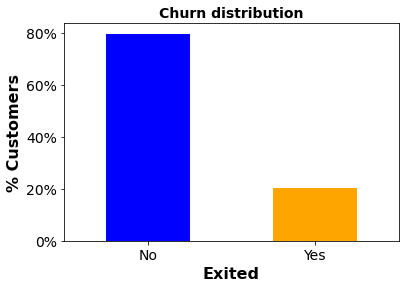

In [12]:
ax = (df['exited'].value_counts()*100/len(df)).plot(kind='bar', rot=0, color=['b','orange'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks([0, 1], labels = ['No', 'Yes'])
ax.set_xlabel('Exited',fontweight='bold')
ax.set_ylabel('% Customers',fontweight='bold')
ax.set_title('Churn distribution',fontweight='bold')
plt.show()

About 20% of the customers left the bank and rest 80% stayed with the bank.

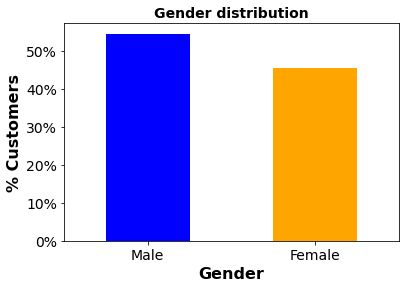

In [13]:
ax = (df['gender'].value_counts()*100/len(df)).plot(kind='bar', rot=0, color=['b','orange'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Gender',fontweight='bold')
ax.set_ylabel('% Customers',fontweight='bold')
ax.set_title('Gender distribution',fontweight='bold')
plt.show()

**Gender Distribution** - About half of the customers in the dataset are male while the other half are female

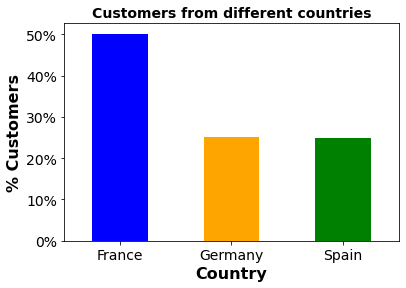

In [14]:
ax = (df['geography'].value_counts()*100/len(df)).plot(kind='bar', rot=0, color=['b','orange','green'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Country', fontweight='bold')
ax.set_ylabel('% Customers',fontweight='bold')
ax.set_title('Customers from different countries', fontweight='bold')
plt.show()

50% Customers are from France, 25% are from Germany and Spain each.

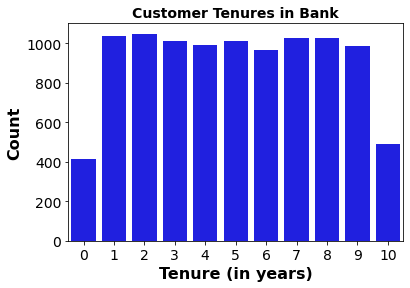

In [15]:
sns.countplot(x = 'tenure', data = df, color = 'blue')
plt.xlabel('Tenure (in years)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Customer Tenures in Bank',fontweight='bold')
plt.show()

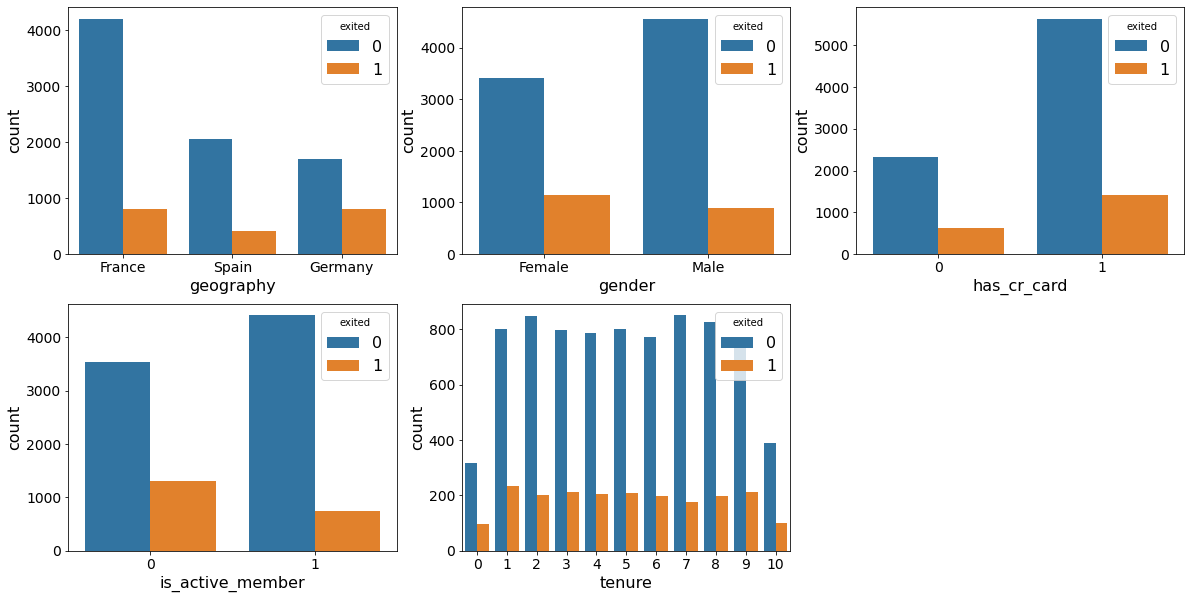

In [16]:
plt.figure(figsize=(20,10))
for n, col in enumerate(['geography', 'gender', 'has_cr_card', 'is_active_member', 'tenure']):
    ax = plt.subplot(2,3,n+1)
    sns.countplot(x=col, hue='exited' ,data=df, ax=ax)

1. Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
2. The proportion of female customers churning is also greater than that of male customers.
3. Majority of the customers that churned are those with credit cards. 
4. The inactive members have a greater churn. The overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definitely have a positive impact on the customer churn.
5. There is no significant relation between tenure and churn.

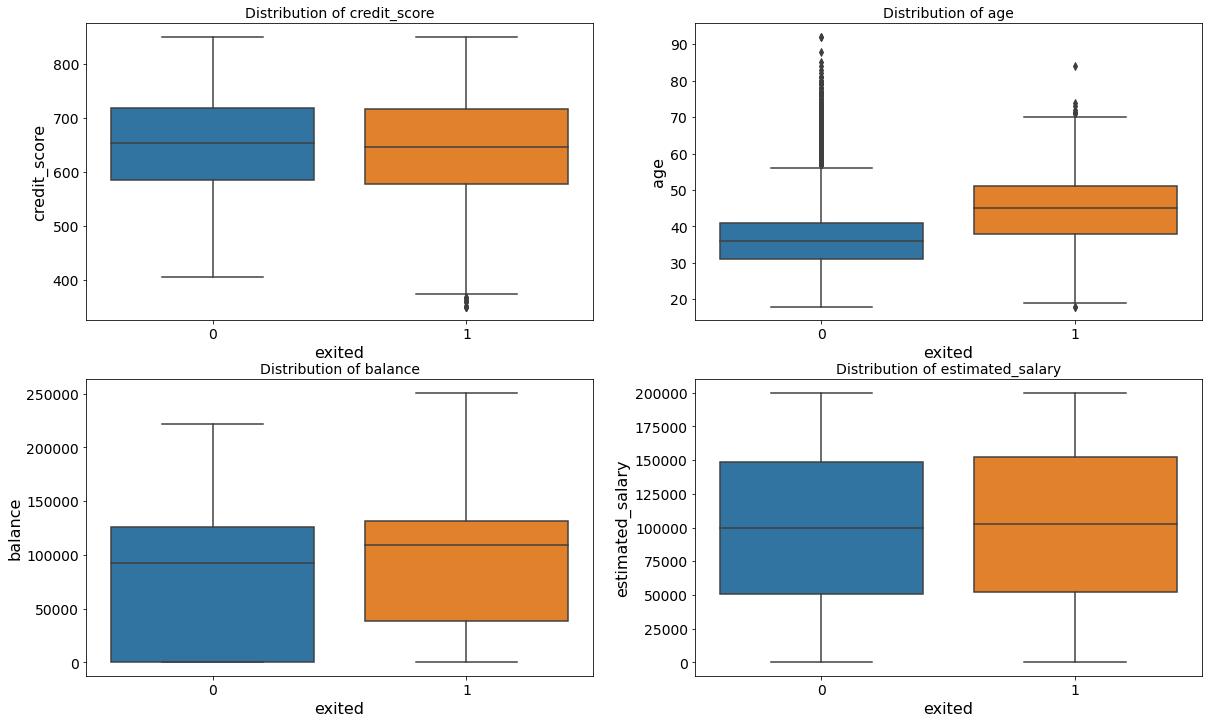

In [17]:
plt.figure(figsize=(20,12))
for n, col in enumerate(['credit_score', 'age', 'balance', 'estimated_salary']):
    ax = plt.subplot(2,2,n+1)
    sns.boxplot(y=col, x='exited', data=df, ax=ax)
    ax.set_title(f'Distribution of {col}')

1. There is no significant difference in the credit score and salary distribution between retained and churned customers.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
3. The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

In [18]:
corr = df.drop(columns = 'exited').corr()
corr

,credit_score,age,balance,estimated_salary
credit_score,1.000000,-0.003965,0.006268,-0.001384
age,-0.003965,1.000000,0.028308,-0.007201
balance,0.006268,0.028308,1.000000,0.012797
estimated_salary,-0.001384,-0.007201,0.012797,1.000000


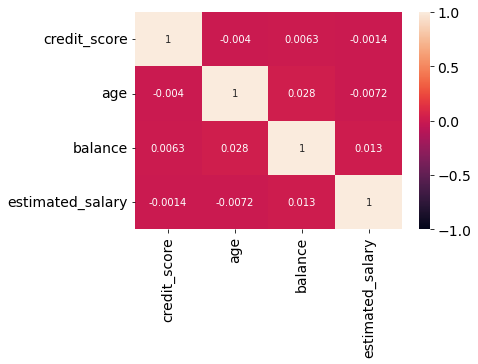

In [19]:
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1)
plt.show()

There is no significant correlation between features.

## Building the model

In [20]:
df.head(2)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [21]:
df_new = df.copy()

In [22]:
# Encoding categorical features

df_new['gender'] = df_new['gender'].map({'Female': 0, 'Male': 1})
geography_df = pd.get_dummies(df['geography'], drop_first = True)
df_new = df_new.drop(columns = 'geography')
df_new = pd.concat([df_new, geography_df], axis = 1)

In [23]:
# Splitting the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns = 'exited'), df_new['exited'], 
                                                   test_size = 0.2, random_state = 10, stratify = df_new['exited'])

In [24]:
df_new

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [25]:
# Scaling numeric features

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:2]

array([[0.44      , 1.        , 0.16216216, 0.2       , 0.52374476,
        0.        , 1.        , 1.        , 0.23972724, 0.        ,
        0.        ],
       [0.968     , 1.        , 0.21621622, 0.5       , 0.        ,
        0.33333333, 0.        , 0.        , 0.26715311, 0.        ,
        1.        ]])

In [26]:
# Fitting the model

model = RandomForestClassifier(max_depth = 5, random_state = 10)
model.fit(X_train_scaled, y_train) 

RandomForestClassifier(max_depth=5, random_state=10)

In [27]:
print(f'Training Scores: {round(model.score(X_train_scaled, y_train)*100, 2)}%')

Training Scores: 86.02%


In [28]:
X_test_scaled = scaler.transform(X_test)

In [29]:
print(f'Test Scores: {round(model.score(X_test_scaled, y_test)*100,2)}%')

Test Scores: 85.7%


In [30]:
model.feature_importances_

array([0.02279553, 0.01781942, 0.43379236, 0.00550124, 0.04646596,
       0.29958937, 0.00128685, 0.09907238, 0.01504391, 0.05536152,
       0.00327145])

In [31]:
feat_imp_series = pd.Series(model.feature_importances_, index = X_train.columns)
feat_imp_series

credit_score        0.022796
gender              0.017819
age                 0.433792
tenure              0.005501
balance             0.046466
num_of_products     0.299589
has_cr_card         0.001287
is_active_member    0.099072
estimated_salary    0.015044
Germany             0.055362
Spain               0.003271
dtype: float64

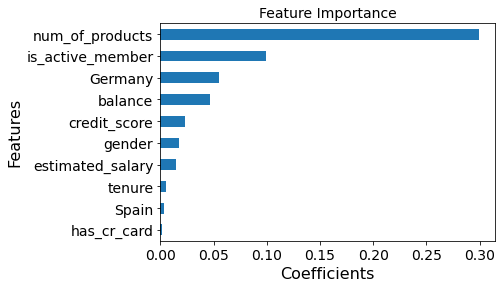

In [32]:
feat_imp_series.sort_values().head(10).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.title('Feature Importance')
plt.show()

Number of products, active status, customers from germany, balance are the top features which can explain churn rate of customers followed by other features as well. Number of products customer has with bank is highly related with churn rate, sp bank should focus on these customers. Customers from Germany are churning at greater proportion, so bank need to focus on how they can better their service in Germany. Customers active status explains churn rate, inactive members are more likely to left the bank, so bank need to focus on how they can retain these customers. Bank should focus on retaining customers having high balance along with customers having low balance.

In [33]:
print('Classification report: \n')
print(classification_report(y_test, model.predict(X_test_scaled)))

Classification report: 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1593
           1       0.87      0.35      0.50       407

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



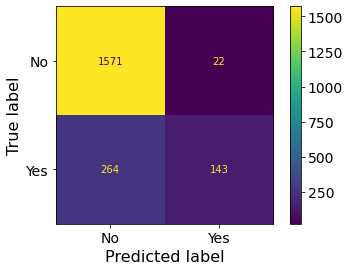

In [34]:
cm = confusion_matrix(y_test, model.predict(X_test_scaled))
ConfusionMatrixDisplay(cm, display_labels = ['No', 'Yes']).plot()
plt.show()